In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib widget

In [25]:
otmol_data_path = "./otmol_output"
otmol_wc0_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_ArbAlignDataWC_emd.csv'))
otmol_ng_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'ng_memory_usage_emd.csv'))
arbalign_data_path = "./arbalign_output"
arbalign_wc0_results = pd.read_csv(os.path.join(arbalign_data_path, 'ArbAlignDataWC_memory_usage.csv'))
arbalign_ng_results = pd.read_csv(os.path.join(arbalign_data_path, 'NeonCluster_memory_usage.csv'))

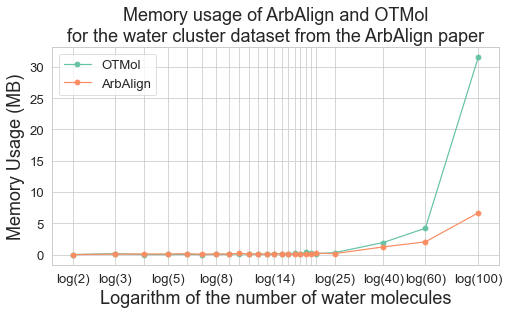

In [27]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set2")
info = pd.read_csv(os.path.join("../Data/Water-Clusters", 'rmsd-2017.dat'), sep='\s+')
df = pd.concat([info, otmol_wc0_emd_results.rename(columns={'memory_used': 'OTMol'}), arbalign_wc0_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)
columns_to_plot = ["OTMol", "ArbAlign"]
for column in columns_to_plot:
    plt.plot(np.log(df['#']), df[column], marker='o', label=column)
ticks = [f'log({i})' if i in [2, 3, 5, 8, 14, 25, 40, 60, 100] else '' for i in df['#']]
plt.xticks(np.log(df['#']), ticks)
plt.title("Memory usage of ArbAlign and OTMol\nfor the water cluster dataset from the ArbAlign paper", fontsize=18)
plt.xlabel("Logarithm of the number of water molecules", fontsize=18)
plt.ylabel("Memory Usage (MB)", fontsize=18)
plt.legend()
plt.grid(True)
plt.savefig('../images/WCArbAlignData_memory.png', dpi=300, bbox_inches='tight')

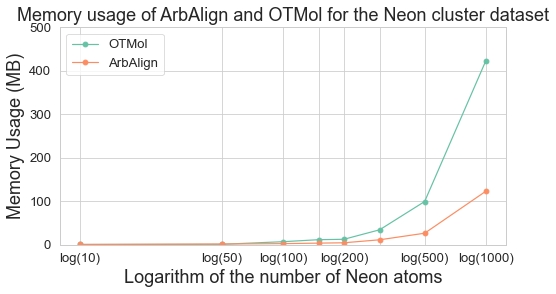

In [30]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set2")
info = pd.read_csv(os.path.join("../Data/Neon-Clusters/", 'rmsd-2017.dat'), sep='\s+')
df = pd.concat([info, otmol_ng_emd_results.rename(columns={'memory_used': 'OTMol'}), arbalign_ng_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)

columns_to_plot = ["OTMol", "ArbAlign"]
for column in columns_to_plot:
    plt.plot(np.log(df['#']), df[column], marker='o', label=column)
ticks = [f'log({i})' if i in [10, 50, 100, 200, 500, 1000] else '' for i in df['#']]
plt.title("Memory usage of ArbAlign and OTMol for the Neon cluster dataset", fontsize=18)
plt.xticks(np.log(df['#']), ticks)
plt.xlabel("Logarithm of the number of Neon atoms", fontsize=18)
plt.ylabel("Memory Usage (MB)", fontsize=18)
plt.ylim(0,500)
plt.legend()
plt.grid(True)
plt.savefig('../images/ng_memory.png', dpi=300, bbox_inches='tight')